In [4]:
# https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras
!tar xzf ./flower_photos.tgz 

In [5]:
%%bash
x=$(dpkg -l|grep imagemagick);[ ${#x} -eq 0 ]&&sudo apt install -y imagemagick
[ ! -f ./flower_photos.tgz ]&&wget http://download.tensorflow.org/example_images/flower_photos.tgz ; tar xzf ./flower_photos.tgz 
find ./flower_photos|grep jpg|xargs -i -t convert {} -quiet -resize 300x224\! -quality 100 -colorspace RGB -type truecolor {} 2>> /tmp/log
find ./flower_photos|grep jpg|head -n 10|xargs -i -t identify {}
rm ./flower_photos/LICENSE.txt

./flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 91.3KB 0.000u 0:00.000
./flower_photos/daisy/12701063955_4840594ea6_n.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 137KB 0.000u 0:00.000
./flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 81.7KB 0.000u 0:00.000
./flower_photos/daisy/5673728_71b8cb57eb.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 77.7KB 0.000u 0:00.000
./flower_photos/daisy/11834945233_a53b7a92ac_m.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 77KB 0.000u 0:00.000
./flower_photos/daisy/9204730092_a7f2182347.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 108KB 0.000u 0:00.000
./flower_photos/daisy/7066602021_2647457985_m.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 111KB 0.000u 0:00.000
./flower_photos/daisy/43474673_7bb4465a86.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 76.6KB 0.000u 0:00.000
./flower_photos/daisy/5876455546_32049e5585.jpg JPEG 300x224 300x224+0+0 8-bit sRGB 64.6KB 0.000u 0:00.000
./flower_photos/daisy/512177035_70a

identify ./flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg 
identify ./flower_photos/daisy/12701063955_4840594ea6_n.jpg 
identify ./flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg 
identify ./flower_photos/daisy/5673728_71b8cb57eb.jpg 
identify ./flower_photos/daisy/11834945233_a53b7a92ac_m.jpg 
identify ./flower_photos/daisy/9204730092_a7f2182347.jpg 
identify ./flower_photos/daisy/7066602021_2647457985_m.jpg 
identify ./flower_photos/daisy/43474673_7bb4465a86.jpg 
identify ./flower_photos/daisy/5876455546_32049e5585.jpg 
identify ./flower_photos/daisy/512177035_70afc925c8.jpg 


In [3]:
import os

print(os.listdir('./flower_photos'))
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



['daisy', 'tulips', 'dandelion', 'roses', 'sunflowers']


In [4]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.python.keras.utils import to_categorical

# specifically for cnn
from tensorflow.python.keras.layers import Dropout, Flatten,Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt


In [5]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='./flower_photos/daisy'
FLOWER_SUNFLOWER_DIR='./flower_photos/sunflowers'
FLOWER_TULIP_DIR='./flower_photos/tulips'
FLOWER_DANDI_DIR='./flower_photos/dandelion'
FLOWER_ROSE_DIR='./flower_photos/roses'

In [6]:
def assign_label(img,flower_type):
    return flower_type
    

In [7]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = plt.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [8]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))



  7%|▋         | 51/699 [00:00<00:01, 505.37it/s]

633


  7%|▋         | 58/799 [00:00<00:01, 570.58it/s]

1332


  7%|▋         | 61/898 [00:00<00:01, 604.81it/s]

2131


  9%|▉         | 59/641 [00:00<00:00, 589.35it/s]

3029


100%|██████████| 641/641 [00:01<00:00, 567.69it/s]

3670


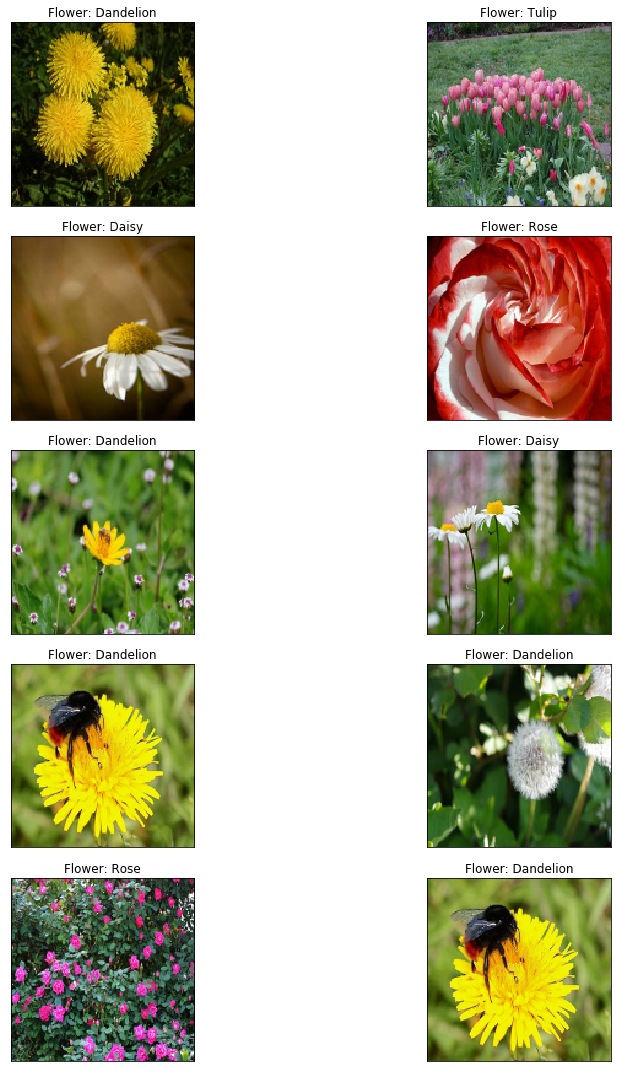

In [9]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
plt.tight_layout()


In [10]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [12]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [13]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
batch_size=128
epochs=50

from tensorflow.python.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
model.compile(optimizer=Adam(lr=0.001),\
              loss='categorical_crossentropy',metrics=['accuracy'])



In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [19]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
21/21 [==============================] - 8s 375ms/step - loss: 1.5440 - acc: 0.2969 - val_loss: 1.2906 - val_acc: 0.4390
Epoch 2/50
21/21 [==============================] - 8s 363ms/step - loss: 1.2752 - acc: 0.4482 - val_loss: 1.1558 - val_acc: 0.4946
Epoch 3/50
21/21 [==============================] - 8s 358ms/step - loss: 1.0933 - acc: 0.5465 - val_loss: 1.0339 - val_acc: 0.5926
Epoch 4/50
21/21 [==============================] - 8s 369ms/step - loss: 1.0262 - acc: 0.5915 - val_loss: 0.9482 - val_acc: 0.6133
Epoch 5/50
21/21 [==============================] - 7s 345ms/step - loss: 0.9422 - acc: 0.6375 - val_loss: 0.9040 - val_acc: 0.6569
Epoch 6/50
918/21 [=================================================================================================================================================================================================================================================================================================================================

21/21 [==============================] - 7s 352ms/step - loss: 0.9012 - acc: 0.6494 - val_loss: 0.9235 - val_acc: 0.6166
Epoch 7/50
21/21 [==============================] - 7s 356ms/step - loss: 0.8945 - acc: 0.6627 - val_loss: 0.8396 - val_acc: 0.6569
Epoch 8/50
21/21 [==============================] - 8s 360ms/step - loss: 0.8154 - acc: 0.6782 - val_loss: 0.7886 - val_acc: 0.6928
Epoch 9/50
21/21 [==============================] - 7s 354ms/step - loss: 0.8275 - acc: 0.6742 - val_loss: 0.8463 - val_acc: 0.6743
Epoch 10/50
21/21 [==============================] - 7s 354ms/step - loss: 0.8159 - acc: 0.6780 - val_loss: 0.7890 - val_acc: 0.7059
Epoch 11/50
21/21 [==============================] - 7s 351ms/step - loss: 0.7782 - acc: 0.6961 - val_loss: 0.7365 - val_acc: 0.7309
Epoch 12/50
918/21 [=====================================================================================================================================================================================================

21/21 [==============================] - 8s 364ms/step - loss: 0.7581 - acc: 0.7068 - val_loss: 0.7031 - val_acc: 0.7440
Epoch 13/50
21/21 [==============================] - 7s 353ms/step - loss: 0.7042 - acc: 0.7302 - val_loss: 0.7729 - val_acc: 0.7146
Epoch 14/50
21/21 [==============================] - 8s 358ms/step - loss: 0.7490 - acc: 0.7157 - val_loss: 0.6927 - val_acc: 0.7331
Epoch 15/50
21/21 [==============================] - 8s 358ms/step - loss: 0.6808 - acc: 0.7306 - val_loss: 0.6860 - val_acc: 0.7397
Epoch 16/50
21/21 [==============================] - 7s 356ms/step - loss: 0.7180 - acc: 0.7355 - val_loss: 0.6659 - val_acc: 0.7418
Epoch 17/50
21/21 [==============================] - 7s 354ms/step - loss: 0.6650 - acc: 0.7386 - val_loss: 0.6899 - val_acc: 0.7298
Epoch 18/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 7s 356ms/step - loss: 0.6419 - acc: 0.7439 - val_loss: 0.6358 - val_acc: 0.7582
Epoch 19/50
21/21 [==============================] - 8s 368ms/step - loss: 0.6095 - acc: 0.7633 - val_loss: 0.5912 - val_acc: 0.7756
Epoch 20/50
21/21 [==============================] - 7s 349ms/step - loss: 0.6197 - acc: 0.7656 - val_loss: 0.6707 - val_acc: 0.7440
Epoch 21/50
21/21 [==============================] - 7s 354ms/step - loss: 0.6676 - acc: 0.7462 - val_loss: 0.7273 - val_acc: 0.7331
Epoch 22/50
21/21 [==============================] - 7s 356ms/step - loss: 0.6284 - acc: 0.7622 - val_loss: 0.6388 - val_acc: 0.7538
Epoch 23/50
21/21 [==============================] - 7s 357ms/step - loss: 0.5845 - acc: 0.7812 - val_loss: 0.6502 - val_acc: 0.7614
Epoch 24/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 8s 357ms/step - loss: 0.5911 - acc: 0.7748 - val_loss: 0.6579 - val_acc: 0.7516
Epoch 25/50
21/21 [==============================] - 8s 358ms/step - loss: 0.5641 - acc: 0.7873 - val_loss: 0.5975 - val_acc: 0.7832
Epoch 26/50
21/21 [==============================] - 8s 366ms/step - loss: 0.5256 - acc: 0.7991 - val_loss: 0.6316 - val_acc: 0.7691
Epoch 27/50
21/21 [==============================] - 7s 357ms/step - loss: 0.5448 - acc: 0.8018 - val_loss: 0.6257 - val_acc: 0.7778
Epoch 28/50
21/21 [==============================] - 8s 362ms/step - loss: 0.5229 - acc: 0.8018 - val_loss: 0.6020 - val_acc: 0.7832
Epoch 29/50
21/21 [==============================] - 8s 363ms/step - loss: 0.5181 - acc: 0.8110 - val_loss: 0.5769 - val_acc: 0.7952
Epoch 30/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 7s 349ms/step - loss: 0.4843 - acc: 0.8156 - val_loss: 0.6635 - val_acc: 0.7789
Epoch 31/50
21/21 [==============================] - 7s 356ms/step - loss: 0.5128 - acc: 0.8064 - val_loss: 0.5690 - val_acc: 0.8017
Epoch 32/50
21/21 [==============================] - 8s 373ms/step - loss: 0.4879 - acc: 0.8185 - val_loss: 0.5976 - val_acc: 0.7919
Epoch 33/50
21/21 [==============================] - 7s 354ms/step - loss: 0.4563 - acc: 0.8342 - val_loss: 0.5513 - val_acc: 0.8105
Epoch 34/50
21/21 [==============================] - 7s 347ms/step - loss: 0.4601 - acc: 0.8125 - val_loss: 0.5696 - val_acc: 0.7996
Epoch 35/50
21/21 [==============================] - 8s 364ms/step - loss: 0.4004 - acc: 0.8545 - val_loss: 0.5260 - val_acc: 0.8126
Epoch 36/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 7s 341ms/step - loss: 0.4214 - acc: 0.8453 - val_loss: 0.5816 - val_acc: 0.7963
Epoch 37/50
21/21 [==============================] - 7s 356ms/step - loss: 0.4346 - acc: 0.8363 - val_loss: 0.5792 - val_acc: 0.7821
Epoch 38/50
21/21 [==============================] - 7s 345ms/step - loss: 0.4101 - acc: 0.8531 - val_loss: 0.5782 - val_acc: 0.7898
Epoch 39/50
21/21 [==============================] - 7s 356ms/step - loss: 0.3972 - acc: 0.8478 - val_loss: 0.5501 - val_acc: 0.8028
Epoch 40/50
21/21 [==============================] - 8s 362ms/step - loss: 0.3888 - acc: 0.8544 - val_loss: 0.6201 - val_acc: 0.7843
Epoch 41/50
21/21 [==============================] - 7s 354ms/step - loss: 0.4143 - acc: 0.8453 - val_loss: 0.6163 - val_acc: 0.7996
Epoch 42/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 8s 362ms/step - loss: 0.4144 - acc: 0.8422 - val_loss: 0.5696 - val_acc: 0.8203
Epoch 43/50
21/21 [==============================] - 7s 355ms/step - loss: 0.3572 - acc: 0.8651 - val_loss: 0.6470 - val_acc: 0.8072
Epoch 44/50
21/21 [==============================] - 7s 350ms/step - loss: 0.3860 - acc: 0.8609 - val_loss: 0.5696 - val_acc: 0.8137
Epoch 45/50
21/21 [==============================] - 8s 359ms/step - loss: 0.3326 - acc: 0.8758 - val_loss: 0.6103 - val_acc: 0.8061
Epoch 46/50
21/21 [==============================] - 8s 371ms/step - loss: 0.2962 - acc: 0.8895 - val_loss: 0.6086 - val_acc: 0.7996
Epoch 47/50
21/21 [==============================] - 7s 356ms/step - loss: 0.3217 - acc: 0.8859 - val_loss: 0.5688 - val_acc: 0.8148
Epoch 48/50
918/21 [==================================================================================================================================================================================================

21/21 [==============================] - 8s 365ms/step - loss: 0.3356 - acc: 0.8765 - val_loss: 0.6435 - val_acc: 0.7908
Epoch 49/50
21/21 [==============================] - 7s 348ms/step - loss: 0.3104 - acc: 0.8852 - val_loss: 0.6032 - val_acc: 0.8083
Epoch 50/50
21/21 [==============================] - 8s 359ms/step - loss: 0.2713 - acc: 0.8998 - val_loss: 0.5988 - val_acc: 0.8137


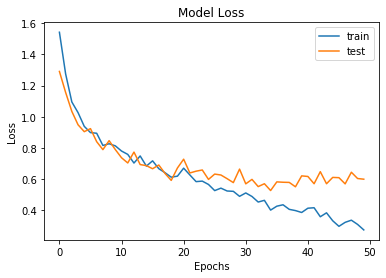

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


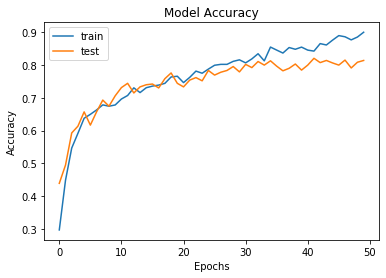

In [21]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [23]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

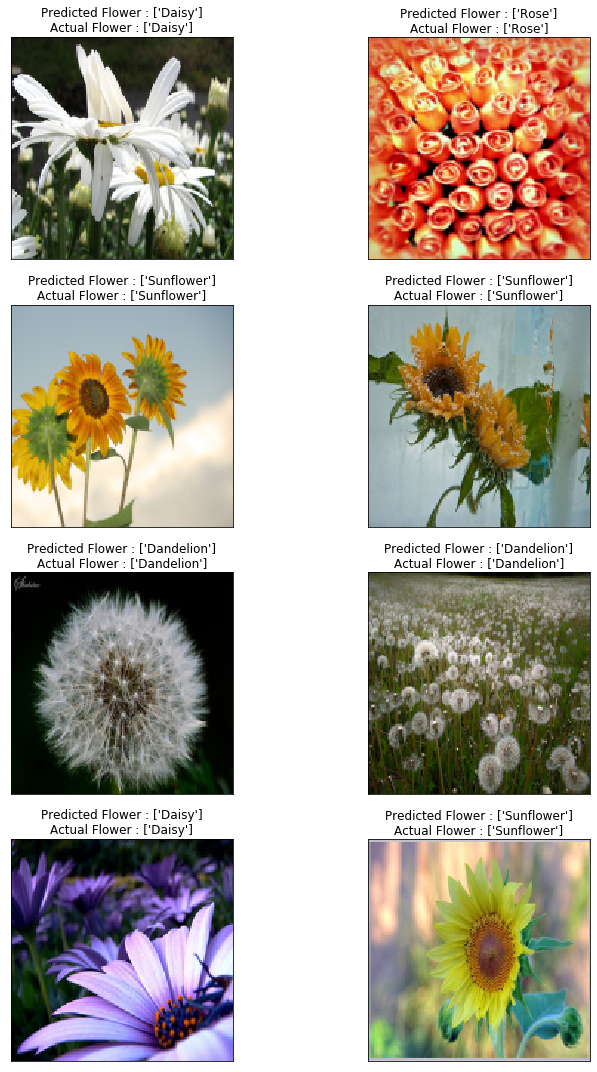

In [24]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits     [prop_class[count      ]]]))+"\n"+ \
                          "Actual Flower : "   +str(le.inverse_transform([np.argmax(y_test[prop_class[count      ]])]))    \
                         )
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        plt.tight_layout()
        count+=1

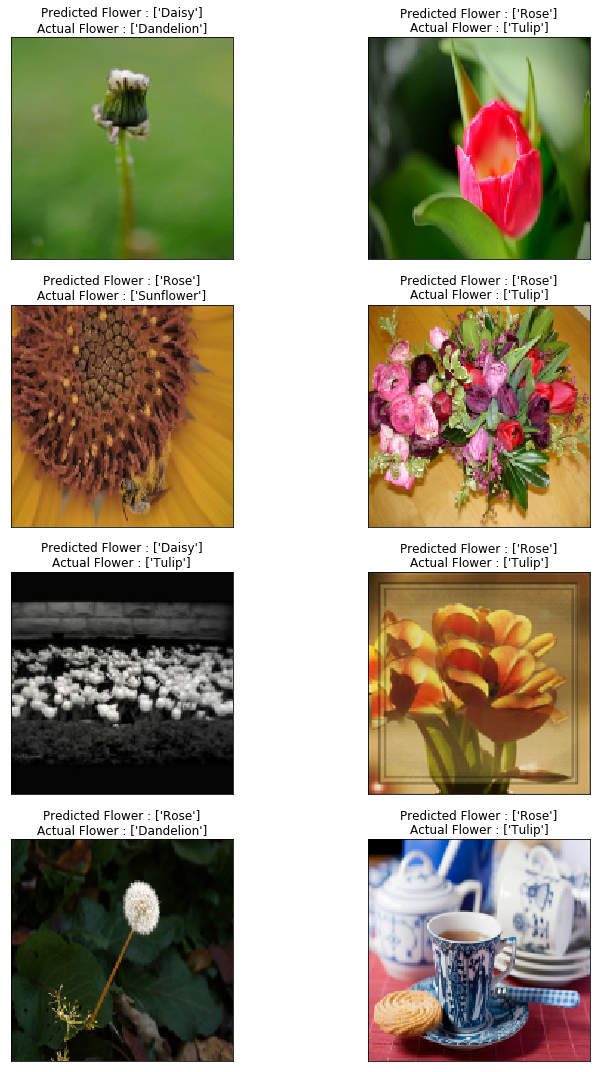

In [25]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+ \
                          "Actual Flower : "   +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])) \
                          )

        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        plt.tight_layout()
        count+=1
